In [10]:
from langchain_openai import ChatOpenAI
from langchain.messages import HumanMessage
from langchain_core.prompts import ChatPromptTemplate,PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_community.document_loaders import DirectoryLoader,PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma, FAISS
from langchain_openai import ChatOpenAI,OpenAIEmbeddings
from langgraph.graph import StateGraph,START, END,MessagesState
from typing import TypedDict,Annotated,Literal
import os 
import sys
sys.path.insert(1, r'D:\Notebooks\LLM\env')
#sys.path.insert(2, r'D:\Notebooks\LLM\langchain_document_loader')
from enviorment import load_env
from langgraph.prebuilt import ToolNode,tools_condition
from langchain_core.tools import tool
#from pydirectoryloader import rag_function
import os 
load_env()
from langchain_community.tools.tavily_search import TavilySearchResults

from langchain_community.document_loaders import WebBaseLoader
from langchain_core.prompts import HumanMessagePromptTemplate
import requests
from bs4 import BeautifulSoup

from urllib.parse import urljoin, urlparse
from tavily import TavilyClient
from langchain_community.tools import DuckDuckGoSearchRun
import time
import yfinance as yf
from langchain_core.tools import tool
from ta.momentum import RSIIndicator
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_experimental.agents import create_pandas_dataframe_agent
import pandas as pd


In [11]:
df = pd.read_csv("ds_salaries.csv")

In [12]:
model=ChatGoogleGenerativeAI(
    model="gemini-2.5-flash-lite",   # or gemini-2.0-pro, 1.5-pro, etc.
    temperature=0.2
)

In [25]:
system_prompt = """
You are a friendly business analyst helping a CEO who has no technical knowledge.
Follow these rules:

1. Always explain answers in simple business language.
2. Avoid technical terms like 'dataframe', 'index', 'NaN', etc.
3. Provide insights, summaries, and recommendations.
4. When showing numbers, include brief interpretation.
5. Keep answers concise but helpful.
6. Never show raw Python or Pandas code to the CEO.
7 If the CEO asks for a chart or graph, generate it using matplotlib and always give data lables so that CEO can easily visualize
"""

In [ ]:
agent = create_pandas_dataframe_agent(
    ChatOpenAI(model="gpt-4.1"),
    df,
    verbose=True,allow_dangerous_code=True,system=system_prompt
)



c:\Users\Dharmendra Vartika\AppData\Local\Programs\Python\Python313\Lib\site-packages\langchain_experimental\agents\agent_toolkits\pandas\base.py:283: UserWarning: Received additional kwargs {'system': "\nYou are a friendly business analyst helping a CEO who has no technical knowledge.\nFollow these rules:\n\n1. Always explain answers in simple business language.\n2. Avoid technical terms like 'dataframe', 'index', 'NaN', etc.\n3. Provide insights, summaries, and recommendations.\n4. When showing numbers, include brief interpretation.\n5. Keep answers concise but helpful.\n6. Never show raw Python or Pandas code to the CEO.\n7 If the CEO asks for a chart or graph, generate it using matplotlib and always give data lables so that CEO can easily visualize\n"} which are no longer supported.
  warnings.warn(


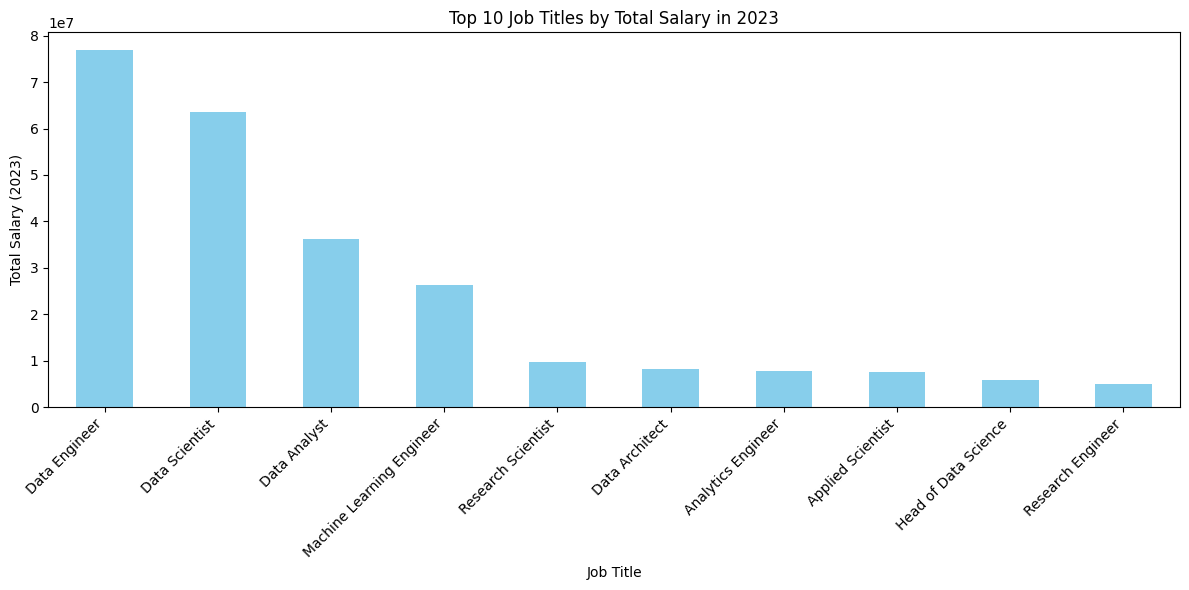

'The total salary for 2023 grouped by job title is largest for Data Engineer, followed by Data Scientist, Data Analyst, etc. The top 10 job titles by total salary in 2023 (as listed above) have been visualized in a bar graph.'

In [39]:
agent.run("Calculate total salary for 2023 grouped by job title and plot a bar graph as well for the top 10 job tiles ")

In [31]:
prompt ="""You are an expert business data analyst responsible for explaining data to a CEO with no technical background.  
Your job is to analyze the dataframe and produce clear, concise, and valuable business insights.

Follow these rules:

### 1. Communication Style
- Use simple business language.
- No technical terms such as dataframe, index, NaN, syntax, lists, or code.
- Focus on what matters to a CEO: performance, trends, risks, opportunities, decisions.

### 2. Smart Narrative Generation
Whenever the user asks for insights or explanations, automatically generate:

A. Key Highlights  
- What stands out the most?  
- Any strong increases, declines, or patterns?

B. Trends  
- Year-over-year or month-over-month movement  
- Positive or negative direction  
- Growth vs. slowdown

C. Exceptions & Anomalies  
- Unusual spikes  
- Underperforming segments  
- Sudden changes

D. Drivers & Root Causes  
- Why are changes happening?  
- What variables are contributing?

E. Risks & Opportunities  
- Identify potential red flags  
- Highlight upside potential

F. Recommendations  
- Clear, action-oriented advice for the CEO  
- Keep it strategic, not technical

### 3. Graphs & Visualization
- If the CEO requests charts, generate them using matplotlib.  
- Use titles, labels, and clean formatting.  
- Explain what the chart means in simple language.

### 4. Dataset Awareness
You already have access to the dataframe.  
Understand the columns, values, patterns, correlations, and distributions.  
Use this knowledge to generate insightful narratives.

### 5. Never Show Code
Do not show Python, pandas, or any technical implementation details.

### 6. Always Be Insight-Driven
Your goal: Help the CEO make decisions, identify risks, and understand business performance.
Keep your answers high-level, strategic, and insightful.
"""


In [32]:
def create_data_dictionary(df):
    dictionary = []
    for col in df.columns:
        dictionary.append({
            "column": col,
            "type": str(df[col].dtype),
            "example": df[col].dropna().iloc[0] if df[col].dropna().size > 0 else None,
            "missing_values": df[col].isna().sum()
        })
    return dictionary

data_dict = create_data_dictionary(df)

In [33]:
prompt = prompt + f"""

### DATA DICTIONARY (Automatically included):
{data_dict}

Use this to understand the dataset better and generate more accurate insights.
"""

In [56]:
agent = create_pandas_dataframe_agent(
    ChatOpenAI(model="gpt-4.1"),
    df,
    verbose=True,allow_dangerous_code=True,system=prompt,  return_intermediate_steps=True
)



c:\Users\Dharmendra Vartika\AppData\Local\Programs\Python\Python313\Lib\site-packages\langchain_experimental\agents\agent_toolkits\pandas\base.py:283: UserWarning: Received additional kwargs {'system': "You are an expert business data analyst responsible for explaining data to a CEO with no technical background.  \nYour job is to analyze the dataframe and produce clear, concise, and valuable business insights.\n\nFollow these rules:\n\n### 1. Communication Style\n- Use simple business language.\n- No technical terms such as dataframe, index, NaN, syntax, lists, or code.\n- Focus on what matters to a CEO: performance, trends, risks, opportunities, decisions.\n\n### 2. Smart Narrative Generation\nWhenever the user asks for insights or explanations, automatically generate:\n\nA. Key Highlights  \n- What stands out the most?  \n- Any strong increases, declines, or patterns?\n\nB. Trends  \n- Year-over-year or month-over-month movement  \n- Positive or negative direction  \n- Growth vs. slo



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe for rows where work_year is 2023, group by job_title and sum the salary, then select the top 10 job titles by total salary. Finally, plot a bar graph of these.
Action: python_repl_ast
Action Input: 
import matplotlib.pyplot as plt

# Filter for 2023
df_2023 = df[df['work_year'] == 2023]

# Group by job_title and sum salary
salary_by_title = df_2023.groupby('job_title')['salary_in_usd'].sum().sort_values(ascending=False)

# Get top 10 job titles
top10 = salary_by_title.head(10)

# Plot
top10.plot(kind='bar', figsize=(10,6), title='Total Salary by Job Title (Top 10) in 2023')
plt.ylabel('Total Salary in USD')
plt.xlabel('Job Title')
plt.tight_layout()
plt.show()

top10

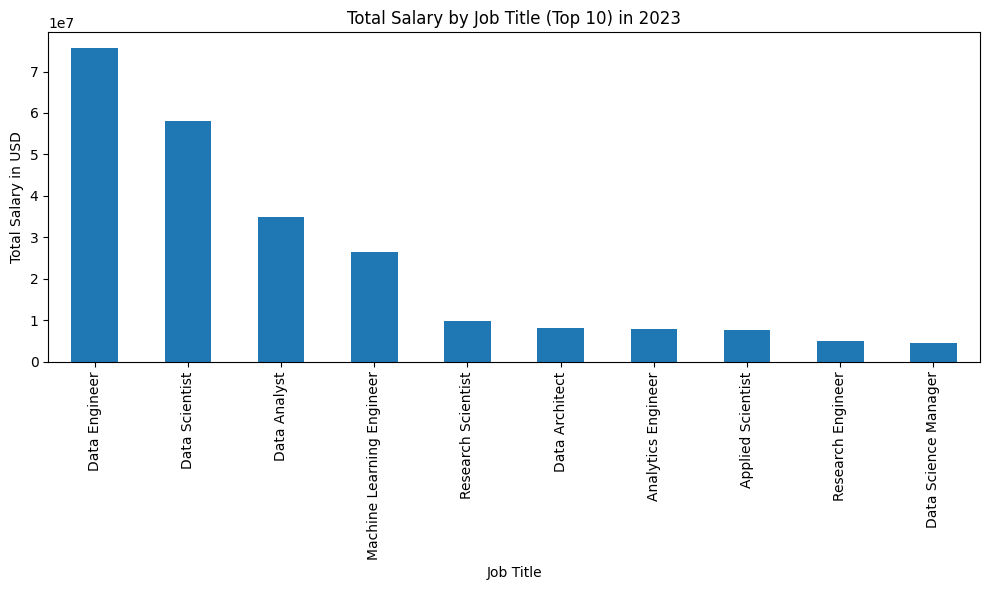

job_title
Data Engineer                75671997
Data Scientist               58020485
Data Analyst                 35027925
Machine Learning Engineer    26506049
Research Scientist            9764697
Data Architect                8192880
Analytics Engineer            7829690
Applied Scientist             7645740
Research Engineer             4995660
Data Science Manager          4494401
Name: salary_in_usd, dtype: int64Final Answer:  
The total salary in USD for 2023 grouped by job title (top 10 job titles) is:

```
job_title
Data Engineer                75,671,997
Data Scientist               58,020,485
Data Analyst                 35,027,925
Machine Learning Engineer    26,506,049
Research Scientist            9,764,697
Data Architect                8,192,880
Analytics Engineer            7,829,690
Applied Scientist             7,645,740
Research Engineer             4,995,660
Data Science Manager          4,494,401
Name: salary_in_usd, dtype: int64
```

A bar graph has been plotted 

In [58]:
#agent.run("Give me a smart summary of this data and if possible use graph if necessary")
response=agent.invoke("Calculate total salary for 2023 grouped by job title and plot a bar graph as well for the top 10 job tiles ")
#agent.run("Give me a smart summary of this data and if possible use graph if necessary")
#response=agent.run("Calculate total salary for 2023 grouped by job title and plot a bar graph as well for the top 10 job tiles ")

In [85]:
response={'input': 'possible can you generate bar graph for the top 10 job titles vs salary\n', 'output': 'The bar graph visualizing the average salary for the top 10 job titles has been generated.', 'intermediate_steps': [(AgentAction(tool='python_repl_ast', tool_input="print(df['job_title'].value_counts().nlargest(10))", log="Thought: The user wants to visualize the top 10 job titles against their salaries using a bar graph.\nFirst, I need to identify the top 10 job titles.\nThen, for each of these top 10 job titles, I need to calculate the average salary.\nFinally, I will create a bar graph to display this information.\n\nTo get the top 10 job titles, I can use `df['job_title'].value_counts().nlargest(10)`.\nTo calculate the average salary for each job title, I can group by 'job_title' and then calculate the mean of 'salary_in_usd'.\nAfter that, I will merge these two results to get the average salary for the top 10 job titles.\nFinally, I will use matplotlib or seaborn to plot the bar graph.\n\nLet's start by getting the top 10 job titles.\nAction: python_repl_ast\nAction Input: print(df['job_title'].value_counts().nlargest(10))"), 'job_title\nData Engineer                1040\nData Scientist                840\nData Analyst                  612\nMachine Learning Engineer     289\nAnalytics Engineer            103\nData Architect                101\nResearch Scientist             82\nApplied Scientist              58\nData Science Manager           58\nResearch Engineer              37\nName: count, dtype: int64\n'), (AgentAction(tool='python_repl_ast', tool_input="print(df.groupby('job_title')['salary_in_usd'].mean().nlargest(10))", log="I have the top 10 job titles. Now I need to calculate the average salary for each of these job titles.\nAction: python_repl_ast\nAction Input: print(df.groupby('job_title')['salary_in_usd'].mean().nlargest(10))"), 'job_title\nData Science Tech Lead                375000.000000\nCloud Data Architect                  250000.000000\nData Lead                             212500.000000\nData Analytics Lead                   211254.500000\nPrincipal Data Scientist              198171.125000\nDirector of Data Science              195140.727273\nPrincipal Data Engineer               192500.000000\nMachine Learning Software Engineer    192420.000000\nData Science Manager                  191278.775862\nApplied Scientist                     190264.482759\nName: salary_in_usd, dtype: float64\n'), (AgentAction(tool='python_repl_ast', tool_input="top_10_job_titles = df['job_title'].value_counts().nlargest(10).index\ndf_top_10_jobs = df[df['job_title'].isin(top_10_job_titles)]\navg_salary_top_10_jobs = df_top_10_jobs.groupby('job_title')['salary_in_usd'].mean()\nprint(avg_salary_top_10_jobs)", log="The previous step gave me the average salary for the top 10 *highest paying* job titles, not the average salary for the *most frequent* top 10 job titles. I need to re-evaluate.\n\nI have the list of the top 10 most frequent job titles from the first step. Now I need to calculate the average salary for *these specific* job titles.\n\nI will filter the dataframe to include only these top 10 job titles and then calculate the mean salary for each.\nAction: python_repl_ast\nAction Input: top_10_job_titles = df['job_title'].value_counts().nlargest(10).index\ndf_top_10_jobs = df[df['job_title'].isin(top_10_job_titles)]\navg_salary_top_10_jobs = df_top_10_jobs.groupby('job_title')['salary_in_usd'].mean()\nprint(avg_salary_top_10_jobs)"), 'job_title\nAnalytics Engineer           152368.631068\nApplied Scientist            190264.482759\nData Analyst                 108716.227124\nData Architect               161713.772277\nData Engineer                142785.734615\nData Science Manager         191278.775862\nData Scientist               140869.765476\nMachine Learning Engineer    154690.726644\nResearch Engineer            163108.378378\nResearch Scientist           161214.195122\nName: salary_in_usd, dtype: float64\n'), (AgentAction(tool='python_repl_ast', tool_input="import matplotlib.pyplot as plt\n\navg_salary_top_10_jobs.sort_values(ascending=False).plot(kind='bar')\nplt.title('Average Salary for Top 10 Job Titles')\nplt.xlabel('Job Title')\nplt.ylabel('Average Salary (USD)')\nplt.tight_layout()\nplt.show()", log="I have successfully calculated the average salary for each of the top 10 most frequent job titles. Now I need to generate a bar graph to visualize this data. I will use matplotlib for this.\nAction: python_repl_ast\nAction Input:\nimport matplotlib.pyplot as plt\n\navg_salary_top_10_jobs.sort_values(ascending=False).plot(kind='bar')\nplt.title('Average Salary for Top 10 Job Titles')\nplt.xlabel('Job Title')\nplt.ylabel('Average Salary (USD)')\nplt.tight_layout()\nplt.show()"), '')]}

NameError: name 'AgentAction' is not defined

In [ ]:
intermediate_steps = response['intermediate_steps']  # list of (action, observation) tuples
python_codes = []
for action, observation in intermediate_steps:
    # Only capture Python REPL / AST steps
    if action.tool.lower() in ["python_repl_ast", "python"]:
        code = action.tool_input
        code=code.replace("\\n", "\n").strip()
        python_codes.append(code)
for i, code in enumerate(python_codes, 1):
    print(f"\n--- Python code block #{i} ---\n")
    print(code)


--- Python code block #1 ---

import matplotlib.pyplot as plt

# Filter for 2023
df_2023 = df[df['work_year'] == 2023]

# Group by job_title and sum salary
salary_by_title = df_2023.groupby('job_title')['salary_in_usd'].sum().sort_values(ascending=False)

# Get top 10 job titles
top10 = salary_by_title.head(10)

# Plot
top10.plot(kind='bar', figsize=(10,6), title='Total Salary by Job Title (Top 10) in 2023')
plt.ylabel('Total Salary in USD')
plt.xlabel('Job Title')
plt.tight_layout()
plt.show()

top10


In [80]:
for i in intermediate_steps[0]:
    print (i)

tool='python_repl_ast' tool_input="import matplotlib.pyplot as plt\n\n# Filter for 2023\ndf_2023 = df[df['work_year'] == 2023]\n\n# Group by job_title and sum salary\nsalary_by_title = df_2023.groupby('job_title')['salary_in_usd'].sum().sort_values(ascending=False)\n\n# Get top 10 job titles\ntop10 = salary_by_title.head(10)\n\n# Plot\ntop10.plot(kind='bar', figsize=(10,6), title='Total Salary by Job Title (Top 10) in 2023')\nplt.ylabel('Total Salary in USD')\nplt.xlabel('Job Title')\nplt.tight_layout()\nplt.show()\n\ntop10" log="Thought: I need to filter the dataframe for rows where work_year is 2023, group by job_title and sum the salary, then select the top 10 job titles by total salary. Finally, plot a bar graph of these.\nAction: python_repl_ast\nAction Input: \nimport matplotlib.pyplot as plt\n\n# Filter for 2023\ndf_2023 = df[df['work_year'] == 2023]\n\n# Group by job_title and sum salary\nsalary_by_title = df_2023.groupby('job_title')['salary_in_usd'].sum().sort_values(ascendin